# Data Science Small Test
For the position of Data Scientist/CRM. You can also access the repository on GitHub: https://github.com/israelmendez232/teste-cientista-dados-crm

---

We start by configuring the main libraries and reading a piece of the data to understand it better:

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import pandas as pd
import numpy as np

dfPoints = pd.read_csv("df_points.txt", delimiter="\t", usecols = ["x", "y", "z", "label"])

print("The first 5 lines to see a 'fraction' of the data:")
dfPoints.head()

The first 5 lines to see a 'fraction' of the data:


,x,y,z,label
0,326.488285,188.988808,-312.205307,0.0
1,-314.287214,307.276723,-179.037412,1.0
2,-328.208910,181.627758,446.311062,1.0
3,-148.658890,147.027947,-27.477959,1.0
4,-467.065931,250.467651,-306.475330,1.0


## Understanding more the data
It's good practice to run a few steps to see more about the data in hands. Shuffeling it'll avoid overfitting the model and to help it make better predictions, while as seeing the data types and describing it will assist to see more what you're dealing as information.

In [2]:
from sklearn.utils import shuffle
print("1. Mixing and shuffling the data. \n")
dfPoints = shuffle(dfPoints)

print("2. See the data type of the columns:")
print(dfPoints.dtypes)

print("\n\n3. More details from a statistical perspective of the data:")
dfPoints.describe()

1. Mixing and shuffling the data. 

2. See the data type of the columns:
x        float64
y        float64
z        float64
label    float64
dtype: object


3. More details from a statistical perspective of the data:


,x,y,z,label
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.850362,-3.108769,-2.601124,0.502700
std,288.379928,287.120263,290.379789,0.500018
min,-499.802348,-499.899134,-499.952571,0.000000
25%,-249.199895,-248.954580,-258.005693,0.000000
50%,3.663472,-5.446168,-8.221000,1.000000
75%,248.879970,244.395864,252.930406,1.000000
max,499.872453,499.752418,499.872329,1.000000


## Configuration and Training the 1st Model
Defining the target and columns for evaluation of the model of Logistic Regression.

In [3]:
Y = dfPoints["label"]
X = dfPoints[["x", "y", "z"]]

train_X, val_X, train_Y, val_Y = train_test_split(X, Y, test_size=0.3)

## Train the model
modelLR = LogisticRegression(n_jobs = 1, C = 1e5, solver = "lbfgs")
modelLR.fit(train_X, train_Y)

accuracyLR = (modelLR.score(val_X, val_Y) * 100)
print(f"Accuracy in Logistic Regression: {accuracyLR}%")

Accuracy in Logistic Regression: 57.833333333333336%


## My method
In the ideal world, we would need to test several models to see which one performs better, but I'll be limited to only 3 other models and compare their performance. Which is:

- Naive Bayes;
- Decision Trees;
- Random Forest;

Here are their results:

---

### Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

modelGNB = GaussianNB()
modelGNB.fit(train_X, train_Y)

# Validate and testing the model:
accuracyGNB = (modelGNB.score(val_X, val_Y) * 100)
print(f"Accuracy in Naive Bayes: {accuracyGNB}%")

Accuracy in Naive Bayes: 57.03333333333334%


### Decision Trees

In [11]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier()
modelDT.fit(train_X, train_Y)

# Validate and testing the model:
accuracyDT = (modelDT.score(val_X, val_Y) * 100)
print(f"Accuracy in Decision Trees: {accuracyDT}%")

Accuracy in Decision Trees: 65.2%


### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(n_estimators = 10)
modelRF.fit(train_X, train_Y)

# Validate and testing the model:
accuracyRF = (modelRF.score(val_X, val_Y) * 100)
print(f"Accuracy in Random Forest: {accuracyRF}%")

Accuracy in Random Forest: 74.3%


---

## And what is the Best Model?
After the calculations, we can provide a decision which is the best model to solve the problem.

,Models,Accuracy
2,Random Forest,74.300000
1,Decision Trees,65.200000
3,Logistic Regression,57.833333
0,Naive Bayes,57.033333


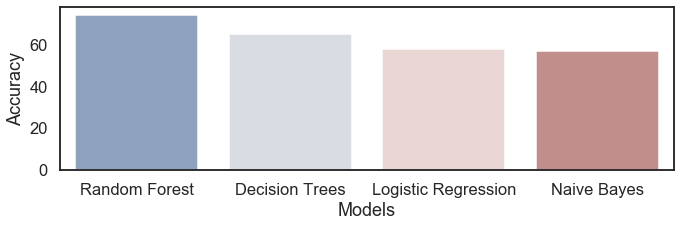

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", context="talk")
f, (ax) = plt.subplots(1, 1, figsize=(11, 3), sharex=True)

dataset = pd.DataFrame({"Models":  ["Naive Bayes", "Decision Trees", "Random Forest", "Logistic Regression"], 
                        "Accuracy": [accuracyGNB, accuracyDT, accuracyRF, accuracyLR]})

dataset = dataset.sort_values("Accuracy", ascending=False)

sns.barplot(x = dataset["Models"], y = dataset["Accuracy"], palette="vlag", ax = ax)

dataset.head()

# Conclusion (Results):
The best model is **Random Forest**, as presented before. The ideal would be to improve the model and test other solutions to increase accuracy, but as presented in the instructions, this is a small test and so it ends here while fulfilling its purpose.

Thank you!